
<img src="./figures/cartopy.png" alt="Cartopy" width="30%" height="30%">


# Cartopy


The Cartopy python library allows you to analyze, process and plot georeferenced data with the help of Matplotlib.


https://scitools.org.uk/cartopy/docs/latest/#


To install the library under the prompt of anaconda:
 conda install -c conda-forge cartopy

## 1 - Example of drawing a 2D Netcdf field

- We will work climatology (1981-2010) monthly minimum daily temperature
- At first we will import the Python libraries and open the Netcdf file

The Dataset class of the netCDF4 module is used to open and read Netcdf files.
Here we will store the Netcdf file in the variable nc_fid.


In [1]:
from netCDF4 import Dataset
import warnings
warnings.filterwarnings("ignore")

filename='./DATA/ANUSPLIN/ANUSPLIN_NLDAS_10km_CLIMATO_TASMIN_1981_2010_06.nc'
nc_fid=Dataset(filename,'r')
nc_fid.variables

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(y, x)
                  units: degrees_east
                  long_name: Longitude
                  CoordinateAxisType: Lon
              unlimited dimensions: 
              current shape = (1068, 420)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(y, x)
                  units: degrees_north
                  long_name: Latitude
                  CoordinateAxisType: Lat
              unlimited dimensions: 
              current shape = (1068, 420)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: Time
                  delta_t: 
                  units: Days
              unlimited dimensions: 
              current shape = (1,)
              fil

We will read TASMIN, lat and lon variables. 

In [2]:
lats = nc_fid.variables['lat'][:]
lons = nc_fid.variables['lon'][:]
time = nc_fid.variables['time'][:]
Vals = nc_fid.variables['TASMIN'][:].squeeze()
print( Vals.shape)

(1068, 420)


We will now call the cartopy and matplotlib libraries from Python to create a graphical instance.
The carto library brings functions to visually enrich maps made with cartopy: adding a scale ...

In [3]:
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
from carto import scale_bar


We create an instance of Cartopy to create a map. We choose here our projection, grid orientation and total coverage.

Here is a very useful link to choose a projection type: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html



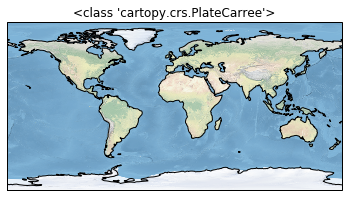

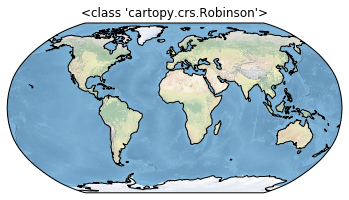

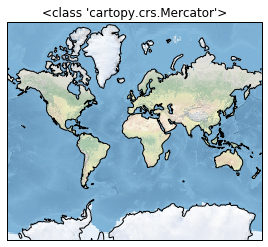

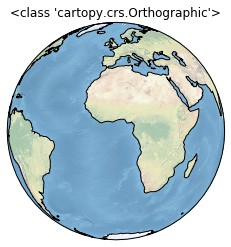

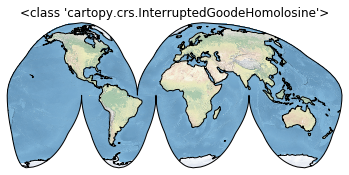

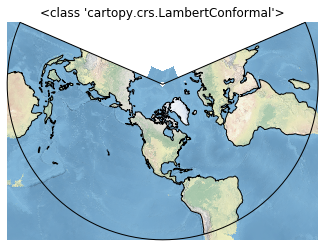

In [5]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine(),
               ccrs.LambertConformal(),
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

In this example, we will work with a so-called "LambertConformal" projection.
To create a regional map, we use the GeoAxis set_extent method to limit the size of our region.

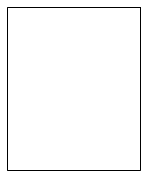

In [6]:
fig=plt.figure(figsize=(5,3), frameon=True)   
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-100,-60,18,62])

We will add some products to our map with Cartopy's cartopy.feature method:
https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html


<table border="1" class="docutils">
<colgroup>
<col width="27%">
<col width="57%">
</colgroup>
<tbody valign="top">

<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>BORDERS</b></span></tt></td>
<td>Borders</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>COASTLINE</b></span></tt></td>
<td>Coast </td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>LAKES</b></span></tt></td>
<td>Lakes</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>LAND</b></span></tt></td>
<td>Continents</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>OCEAN</b></span></tt></td>
<td>Ocean</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>RIVERS</b></span></tt></td>
<td>Rivers</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>STATES</b></span></tt></td>
<td>States</td>
</tr>

</tbody>
</table>



We will also add the provinces with Cartopy's NaturalEarthFeature class:
https://scitools.org.uk/cartopy/docs/v0.16/matplotlib/feature_interface.html#cartopy.feature.NaturalEarthFeature

We work here by adding layers.


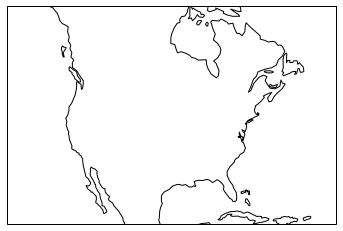

In [7]:
# adding caost:
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
plt.show()


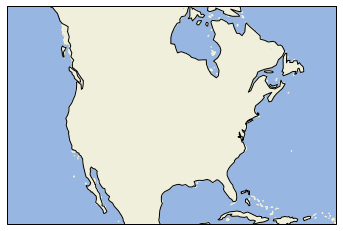

In [8]:
# adding land and oceanss:

ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
plt.show()

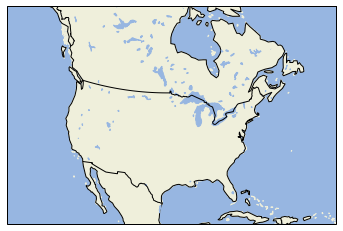

In [9]:
# adding lakes and rivers
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
plt.show()

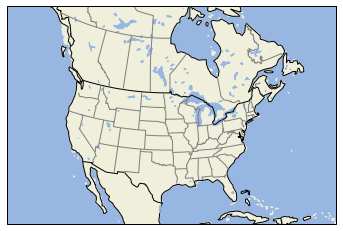

In [10]:
# Adding states
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
plt.show()

We can now fill our map with our georeferenced field with the method pcolormesh of matplotlib: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html

Here Lat Lon coordinates are in 2D, so in each grid point we know the latitude and longitude of our fields.

It is possible that for a netcdf file Lat and Lon are in 1D. We must then write them in 2D with the following command:

-lon, lat = np.meshgrid (lons, lats)

We will also produce our own color palette. Here is a useful link to select our colors and create our palette: http://colorbrewer2.org/#type=diverging&scheme=RdYlBu&n=8

You can also use one of the color palettes predefined by Matplotlip: https://matplotlib.org/examples/color/colormaps_reference.html

We will use to draw our map type pcolormesh matplotib. Other types of plots are available: https://matplotlib.org/basemap/users/examples.html

To improve the reading of our map, we can at this level add:

- a legend under the map: cbar.set_label
- add a color bar with a display interval: plt.colorbar


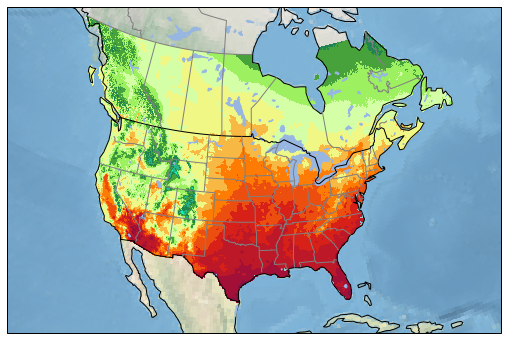

In [11]:
Y=np.array([[77,0,111],[115,14,181],[160,17,222],[195,14,240],\
               [0,0,93],[21,38,177],[33,95,227],[32,162,247],[59,224,248],[202,255,250],\
               [4,255,179],[37,181,139],[32,132,81],[72,162,60],[157,240,96],[213,255,166],\
               [241,247,132],[248,185,68],[255,124,4],[235,78,14],[215,32,24],[189,24,40],[162,16,56],[135,16,65],[107,15,73]])/255.

colbar=mpl.colors.ListedColormap(Y)
fig=plt.figure(figsize=(10,6), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

mm = ax.pcolormesh(lons,\
                   lats,\
                   Vals,\
                   vmin=-28,\
                   vmax=28, \
                   transform=ccrs.PlateCarree(),\
                   cmap=colbar )


ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();
plt.show() 


If the pallet is not suitable, it is possible to use a palette of Matplotlib.

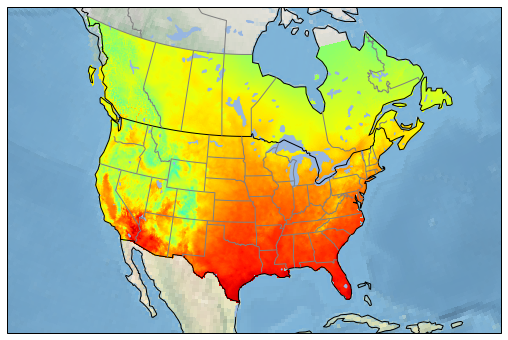

In [12]:
fig=plt.figure(figsize=(10,6), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

mm = ax.pcolormesh(lons,\
                   lats,\
                   Vals,\
                   vmin=-28,\
                   vmax=28, \
                   transform=ccrs.PlateCarree(),\
                   cmap='jet' )


ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();
plt.show() 


We can finally add:
    - a title to our chart: plt.title
    - a color bar plt.colorbar
    - a title to our color bar: plt.xlabel
    - latitudes and longitudes with the function: gridlines ()
    - a scale bar: scale_bar ()
    
Then save our chart with the command: plt.savefig

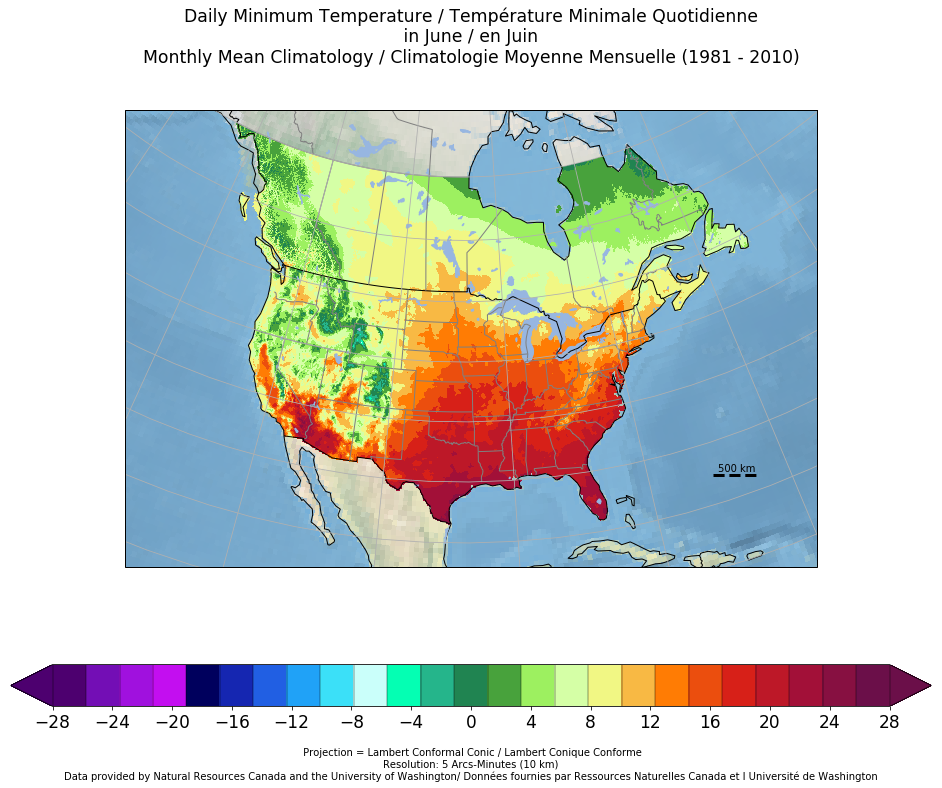

In [13]:
Y=np.array([[77,0,111],[115,14,181],[160,17,222],[195,14,240],\
               [0,0,93],[21,38,177],[33,95,227],[32,162,247],[59,224,248],[202,255,250],\
               [4,255,179],[37,181,139],[32,132,81],[72,162,60],[157,240,96],[213,255,166],\
               [241,247,132],[248,185,68],[255,124,4],[235,78,14],[215,32,24],[189,24,40],[162,16,56],[135,16,65],[107,15,73]])/255.

colbar=mpl.colors.ListedColormap(Y)
fig=plt.figure(figsize=(22,12), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

mm = ax.pcolormesh(lons,\
                   lats,\
                   Vals,\
                   vmin=-28,\
                   vmax=28, \
                   transform=ccrs.PlateCarree(),\
                   cmap=colbar )


ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-150.0,-40.0,20)
yticks =np.arange(10,80,10)
ax.gridlines()

# Standard 6,000 km scale bar.
scale_bar(ax, (0.85, 0.2), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

cbar = plt.colorbar(mm, orientation='horizontal', shrink=0.75, drawedges='True', ticks=np.arange(-28, 28.1, 4),extend='both')
cbar.set_label(u'\n Projection = Lambert Conformal Conic / Lambert Conique Conforme\nResolution: 5 Arcs-Minutes (10 km)\nData provided by Natural Resources Canada and the University of Washington/ Données fournies par Ressources Naturelles Canada et l Université de Washington', size='medium') # Affichage de la légende de la barre de couleur
cbar.ax.tick_params(labelsize=17) 
 
plt.xlabel(u'\n\n\nTemperature / Température (°C)',size='x-large')
string_title=u'Daily Minimum Temperature / Température Minimale Quotidienne\n in June / en Juin \nMonthly Mean Climatology / Climatologie Moyenne Mensuelle (1981 - 2010)\n\n'
plt.title(string_title, size='xx-large')
plt.savefig('./figures/ANUSPLIN_NLDAS_10km_CLIM_TASMIN_06_1981-2010.png', bbox_inches='tight', pad_inches=0.1)
plt.show() 


## 2 - Another example  2D Netcdf

- We will work with the climatology of the total monthly precipitation accumulation  (1981-2010) for the month of December.

In [14]:
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from carto import scale_bar

In [15]:
rep_data='./DATA/ANUSPLIN/'
fic=rep_data+'ANUSPLIN_NLDAS_10km_CLIMATO_PrecTOT_1981_2010_12.nc'
dset=Dataset(fic)

In [16]:
precip=dset.variables['PrecTOT'][:].squeeze()
lon=dset.variables['lon'][:].squeeze()
lat=dset.variables['lat'][:].squeeze()

In [17]:
## Interrogeons un peu chaque variable
print('-----------------------------------------')
print('dimension de precipitation = ',precip.shape)
print('Min de precip est = ', np.nanmin(precip))
print('Max de precip est = ', np.nanmax(precip))
print('-----------------------------------------')
print('-----------------------------------------')
print('dimension de latitude = ',lat.shape)
print('Min de lat est = ', np.min(lat))
print('Max de lat est = ', np.max(lat))
print('-----------------------------------------')
print('-----------------------------------------')
print('dimension de longitude = ',lon.shape)
print('Min de lon est = ', np.min(lon))
print('Max de lon est = ', np.max(lon))
print('-----------------------------------------')

-----------------------------------------
dimension de precipitation =  (1068, 420)
Min de precip est =  2.2327309
Max de precip est =  809.1944
-----------------------------------------
-----------------------------------------
dimension de latitude =  (1068, 420)
Min de lat est =  25.125
Max de lat est =  60.041664
-----------------------------------------
-----------------------------------------
dimension de longitude =  (1068, 420)
Min de lon est =  -140.95833
Max de lon est =  -52.04167
-----------------------------------------


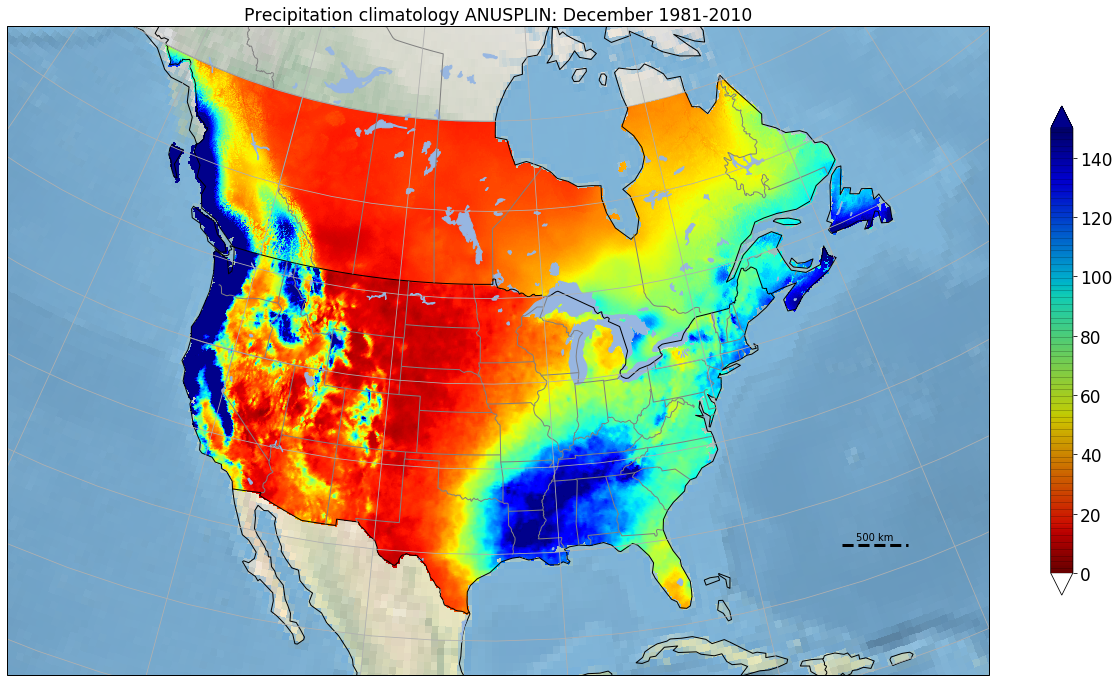

In [18]:
fig = plt.figure(figsize=(22,12))

ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

## Choisissons une colormap
cmap0=plt.cm.jet_r
cmap0.set_under('w') ## on met en blanc les valeurs inferieures au min de clev
cmap0.set_over('darkblue') ## bleu fonce pour les valeurs extremes de pluie

mm = ax.pcolormesh(lon,\
                   lat,\
                   precip,\
                   vmin=0,\
                   vmax=150, \
                   transform=ccrs.PlateCarree(),\
                   cmap=cmap0 )

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();

ax.gridlines()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-150.0,-40.0,20)
yticks =np.arange(10,80,10)

fig.canvas.draw()

# Standard 6,000 km scale bar.
scale_bar(ax, (0.85, 0.2), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

cbar = plt.colorbar(mm, shrink=0.75, drawedges='True', ticks=np.arange(0, 150.1, 20),extend='both')
cbar.ax.tick_params(labelsize=17) 

plt.xlabel(u'\Precipitation (mm)',size='x-large')
string_title=u'Precipitation climatology ANUSPLIN: December 1981-2010'
plt.title(string_title, size='xx-large')
plt.savefig('./figures/My_2Dlalon_plot.png', bbox_inches='tight', pad_inches=0.1,  dpi=150)
plt.show()  
plt.close()

## 3 - Cartopy: example with overplot

Sometimes we want to have many plots on the same picture. 

- We will work the climatologies of the total monthly accumulation of precipitation (1981-2010) for all the months of the year.


 We will produce the same previous operation but for each month using a loop for.


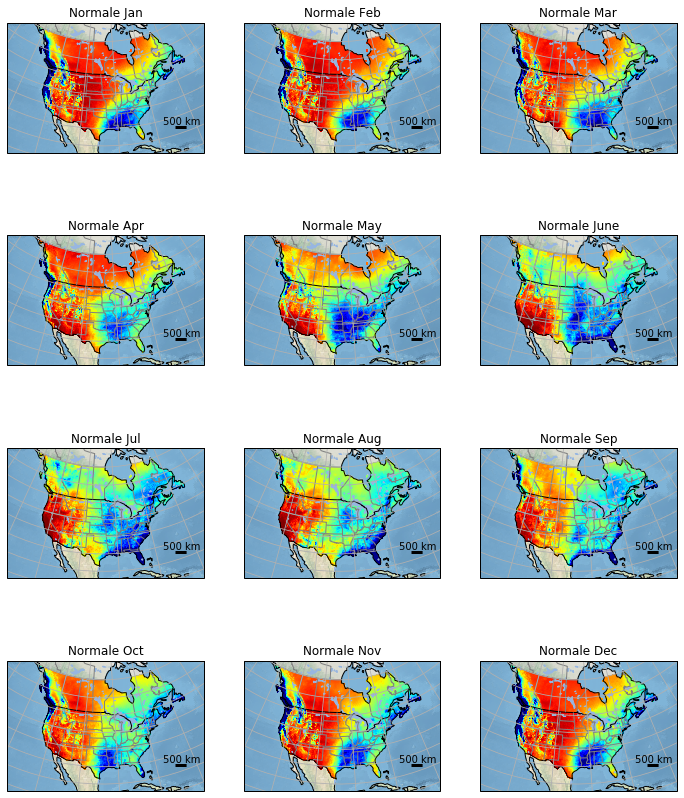

In [19]:
## we import librairies that we need

from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from carto import scale_bar

month_name=["Jan","Feb","Mar","Apr","May","June","Jul","Aug","Sep","Oct","Nov","Dec"]
rep_data='./DATA/ANUSPLIN/'

fig=plt.figure(figsize=(12,15))
clevs=np.arange(5,150.1,5)
## Colormap we will use
cmap0=plt.cm.jet_r
cmap0.set_under('w') 
cmap0.set_over('darkblue')

for imonth in np.arange(1,13):  # loop over 12 months
    ax=fig.add_subplot(4,3,imonth, projection=ccrs.LambertConformal())   
    fic=rep_data+'ANUSPLIN_NLDAS_10km_CLIMATO_PrecTOT_1981_2010_'+'{:02d}'.format(imonth)+'.nc'
    dset=Dataset(fic)
    precip=dset.variables['PrecTOT'][:].squeeze()
    lon=dset.variables['lon'][:].squeeze()
    lat=dset.variables['lat'][:].squeeze()
    
    ax.set_extent([-130,-60,18,62])
    ax.coastlines(resolution='110m');
    ax.add_feature(cfeature.LAND.with_scale('50m'))
    ax.add_feature(cfeature.OCEAN.with_scale('50m'))
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))

    mm = ax.pcolormesh(lon,\
                   lat,\
                   precip,\
                   vmin=0,\
                   vmax=150, \
                   transform=ccrs.PlateCarree(),\
                   cmap=cmap0 )
    plt.title('Normale '+ month_name[imonth-1],fontsize=12)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    ax.add_feature(states_provinces, edgecolor='gray')  
    ax.stock_img();
    ax.gridlines();
    # Standard 6,000 km scale bar.
    scale_bar(ax, (0.85, 0.2), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

plt.savefig('./figures/My_2Dlalon_multipanel_plot.png')
plt.show()

## 4 - Cartopy:  MODIS 

https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg

https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.txt

Text(-117, 33, 'San Diego')

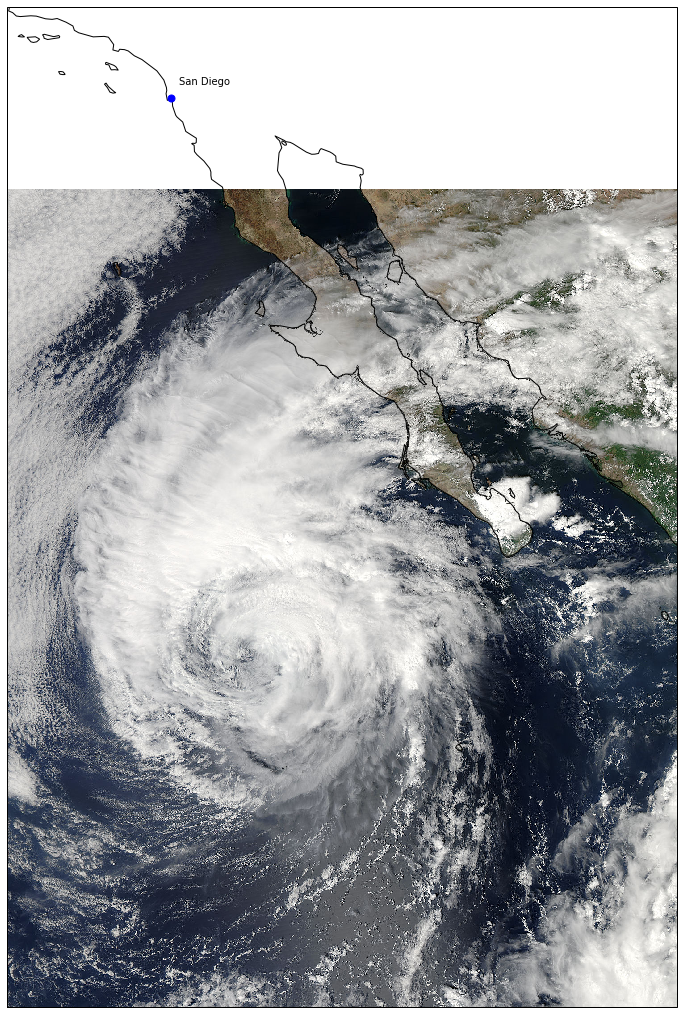

In [21]:
fig = plt.figure(figsize=(12, 20))

fname = './figures/Miriam.A2012270.2050.1km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# ajout de l'image
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# ajout d'une ville
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())